# Covid-19 prediction for india by three method
svm,polynomial reg,and prophet

   <font face = "Verdana" size ="1">
    <center><img src='https://cdn.mos.cms.futurecdn.net/WxgePFJHTNAQRBuP3g5hoM-650-80.jpg.webp'>

In [ ]:
import numpy as np
from pandas import DataFrame
# importing the required libraries
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

## by using same Johns Hopkins University dataset

In [ ]:
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
in_confirmed_cases = confirmed_cases.loc[confirmed_cases['Country/Region'] == 'India']
in_confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,11096731,11112241,11124527,11139516,11156923,11173761,11192045,11210799,11229398,11244786,11262707,11285561,11308846,11333728,11359048,11385339,11409831,11438734,11474605,11514331,11555284,11599130,11646081,11686796,11734058,11787534,11846652,11908910,11971624,12039644,12095855,12149335,12221665,12303131,12392260,12485509,12589067,12686049,12801785,12928574


In [ ]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
in_deaths_reported = deaths_reported.loc[confirmed_cases['Country/Region'] == 'India']
in_deaths_reported

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21
146,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,157051,157157,157248,157346,157435,157548,157656,157756,157853,157930,158063,158189,158306,158446,158607,158725,158856,159044,159216,159370,159558,159755,159967,160166,160441,160692,160949,161240,161552,161843,162114,162468,162927,163396,164110,164623,165101,165547,166177,166862


In [ ]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
in_recovered_cases = recovered_cases.loc[recovered_cases['Country/Region'] == 'India']
in_recovered_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21
131,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,...,10775169,10786452,10798921,10812044,10826075,10839894,10854126,10868520,10882798,10899394,10920046,10938146,10953303,10973260,10989897,11007352,11027543,11045284,11063025,11083679,11107332,11130288,11151468,11181253,11205160,11231650,11264637,11295023,11323762,11355993,11393021,11434301,11474683,11525039,11569241,11629289,11682136,11732279,11792135,11851393


## stat wise daily cases in india

In [ ]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2021.csv')
in_latest_data = latest_data.loc[latest_data['Country_Region'] == 'India']
in_latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
249,NaN,NaN,Andaman and Nicobar Islands,India,2021-04-03 04:20:44,11.225999,92.968178,5084,62,4981.0,41.0,"Andaman and Nicobar Islands, India",1219.079408,1.219512
250,NaN,NaN,Andhra Pradesh,India,2021-04-03 04:20:44,15.912900,79.740000,904548,7225,888508.0,8815.0,"Andhra Pradesh, India",1678.091025,0.798741
251,NaN,NaN,Arunachal Pradesh,India,2021-04-03 04:20:44,27.768456,96.384277,16846,56,16785.0,5.0,"Arunachal Pradesh, India",1072.680708,0.332423
252,NaN,NaN,Assam,India,2021-04-03 04:20:44,26.357149,92.830441,218533,1107,215517.0,1909.0,"Assam, India",613.735391,0.506560
253,NaN,NaN,Bihar,India,2021-04-03 04:20:44,25.679658,85.604840,266677,1580,262733.0,2364.0,"Bihar, India",213.683620,0.592477


In [ ]:
in_data = in_latest_data.drop(index= [282]) # we have null values in that row

In [ ]:
in_data2 = in_data.drop(columns= ['FIPS', 'Admin2','Country_Region','Lat', 'Long_','Combined_Key',])

In [ ]:
in_data2.style.background_gradient(cmap='Reds')

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
249,Andaman and Nicobar Islands,2021-04-03 04:20:44,5084,62,4981.000000,41.000000,1219.079408,1.219512
250,Andhra Pradesh,2021-04-03 04:20:44,904548,7225,888508.000000,8815.000000,1678.091025,0.798741
251,Arunachal Pradesh,2021-04-03 04:20:44,16846,56,16785.000000,5.000000,1072.680708,0.332423
252,Assam,2021-04-03 04:20:44,218533,1107,215517.000000,1909.000000,613.735391,0.506560
253,Bihar,2021-04-03 04:20:44,266677,1580,262733.000000,2364.000000,213.683620,0.592477
254,Chandigarh,2021-04-03 04:20:44,27543,381,24064.000000,3098.000000,2377.526278,1.383292
255,Chhattisgarh,2021-04-03 04:20:44,357978,4247,321873.000000,31858.000000,1216.113571,1.186386
256,Dadra and Nagar Haveli and Daman and Diu,2021-04-03 04:20:44,3703,2,3499.000000,202.000000,601.405825,0.054010
257,Delhi,2021-04-03 04:20:44,668814,11050,645770.000000,11994.000000,3574.457742,1.652178
258,Goa,2021-04-03 04:20:44,58584,832,55838.000000,1914.000000,3693.238771,1.420183


In [ ]:
map = folium.Map(location=[20, 60], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(in_data['Lat'], in_data['Long_'], in_data['Confirmed'], in_data['Province_State']):
    folium.CircleMarker([lat, lon], radius=value*(1/40000), popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<strong>Confirmed</strong>: ' + str(value) + ' '),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## Data pre-processing for prediction

In [ ]:
c_df23 = in_confirmed_cases.drop(columns= ['Province/State','Country/Region','Lat','Long'])
d_df23 = in_deaths_reported.drop(columns= ['Province/State','Country/Region','Lat','Long'])
r_df23 = in_recovered_cases.drop(columns= ['Province/State','Country/Region','Lat','Long'])


In [ ]:
dfconfirmed_cases = c_df23.transpose()
dfdeaths_reported = d_df23.transpose()
dfrecovered_cases = r_df23.transpose()

In [ ]:
dfconfirmed_cases.index.name = 'Date_YMD'
dfconfirmed_cases.reset_index(inplace=True)
dfdeaths_reported.index.name = 'Date_YMD'
dfdeaths_reported.reset_index(inplace=True)
dfrecovered_cases.index.name = 'Date_YMD'
dfrecovered_cases.reset_index(inplace=True)


In [ ]:
c_df11 = dfconfirmed_cases.rename(columns={ 146 : "TotalConfirmed"})
d_df11 = dfdeaths_reported.rename(columns={ 146 : "TotalDeath"})
r_df11 = dfrecovered_cases.rename(columns={ 131 : "TotalRecovered"})

In [ ]:
df_confirmed = c_df11
df_deaths = d_df11
df_recovered = r_df11

In [ ]:
pip install pycountry

In [ ]:
pip install geopandas

In [ ]:
import pycountry
import plotly.express as px
import pandas as pd
# Starting the required libraries
import numpy as np
import geopandas as gpd
import pandas as pd
from functools import reduce

In [ ]:
id_list = in_confirmed_cases.columns.to_list()[:4]
vars_list = in_confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(in_confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(in_deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(in_recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
# 1.3 Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [ ]:
corona_sums = df_corona.groupby(['type', 'Date'],as_index=False).agg({'Count':'sum'})


In [ ]:
pip install plotly_express

In [ ]:
import plotly_express as px
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='Count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums)
fig.show()

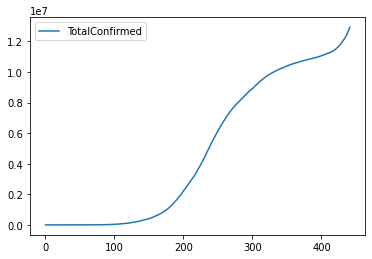

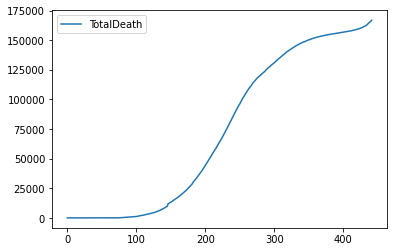

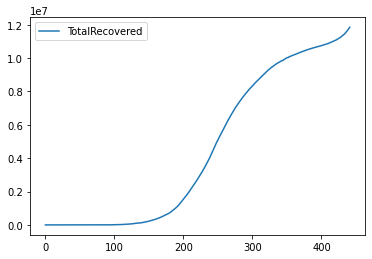

In [ ]:
df_confirmed.plot()
df_deaths.plot()
df_recovered.plot()

In [ ]:
df_c = df_confirmed
df_c.columns = ['ds', 'y']

In [ ]:
df_d = df_deaths
df_d.columns = ['ds', 'y']


In [ ]:
df_r = df_recovered
df_r.columns = ['ds', 'y']


In [ ]:
df_c['ds'] = pd.to_datetime(df_c['ds'])


In [ ]:
df_d['ds'] = pd.to_datetime(df_d['ds'])


In [ ]:
df_r['ds'] = pd.to_datetime(df_r['ds'])

## method1: by using prophet model

In [ ]:
from fbprophet import Prophet

In [ ]:
# Initialize the Model
c_model = Prophet(daily_seasonality=True)
c_model.fit(df_c)
d_model = Prophet(daily_seasonality=True)
d_model.fit(df_d)
r_model = Prophet(daily_seasonality=True)
r_model.fit(df_r)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
# Create future dates of 30 days
future_dates = c_model.make_future_dataframe(periods = 100)
future_dates.tail()

,ds
537,2021-07-12
538,2021-07-13
539,2021-07-14
540,2021-07-15
541,2021-07-16


In [ ]:
c_prediction = c_model.predict(future_dates)
d_prediction = d_model.predict(future_dates)
r_prediction = r_model.predict(future_dates)


In [ ]:
corona_sums

,type,Date,Count
0,Confirmed,2020-01-22,0
1,Confirmed,2020-01-23,0
2,Confirmed,2020-01-24,0
3,Confirmed,2020-01-25,0
4,Confirmed,2020-01-26,0
...,...,...,...
1321,recovered,2021-04-03,11629289
1322,recovered,2021-04-04,11682136
1323,recovered,2021-04-05,11732279
1324,recovered,2021-04-06,11792135


In [ ]:
id_list = in_confirmed_cases.columns.to_list()[:4]
vars_list = in_confirmed_cases.columns.to_list()[4:]
confirmed_tidy = pd.melt(in_confirmed_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Confirmed')
deaths_tidy = pd.melt(in_deaths_reported, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='Deaths')
recovered_tidy = pd.melt(in_recovered_cases, id_vars=id_list,value_vars=vars_list, var_name='Date', value_name='recovered')
# 1.3 Merging the three dataframes into one
data_frames = [confirmed_tidy, deaths_tidy, recovered_tidy]          
df_corona = reduce(lambda left, right: pd.merge(left, right, on = id_list+['Date'], how='outer'), data_frames)

id_vars = df_corona.columns[:5]
data_type = ['Confirmed', 'Deaths', 'recovered']
df_corona = pd.melt(df_corona, id_vars=id_vars,value_vars=data_type, var_name='type', value_name='Count')
df_corona['Date'] = pd.to_datetime(df_corona['Date'],format='%m/%d/%y', errors='raise')

In [ ]:
aq = np.round(c_prediction)
aq1 = np.round(d_prediction)
aq2 = np.round(r_prediction)

In [ ]:
v1 = aq[aq.columns[0:2]]
v1['type'] = 'Confirmed'
v2 = aq1[aq.columns[0:2]]
v2['type'] = 'Deaths'
v3 = aq2[aq.columns[0:2]]
v3['type'] = 'recovered'
data_frames = [v1,v2,v3]
df = pd.concat([v1, v2, v3], axis=0)
df.reset_index(drop=True, inplace=True)
df

,ds,trend,type
0,2020-01-22,-1309.0,Confirmed
1,2020-01-23,-1118.0,Confirmed
2,2020-01-24,-926.0,Confirmed
3,2020-01-25,-735.0,Confirmed
4,2020-01-26,-543.0,Confirmed
...,...,...,...
1621,2021-07-12,13099345.0,recovered
1622,2021-07-13,13115961.0,recovered
1623,2021-07-14,13132577.0,recovered
1624,2021-07-15,13149193.0,recovered


In [ ]:
corona_sums1 = df.groupby(['type', 'ds'],as_index=False).agg({'trend':'sum'})
def plot_timeseries1(df):
    fig = px.line(df, x='ds', y='trend', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)
    
fig = plot_timeseries1(corona_sums1)
fig.show()

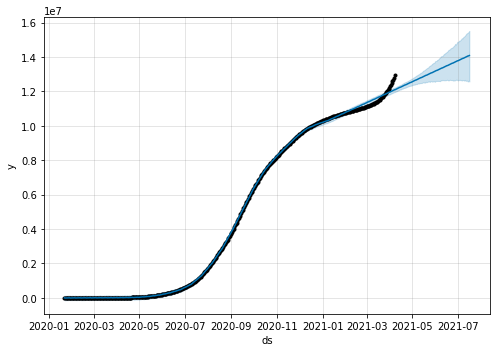

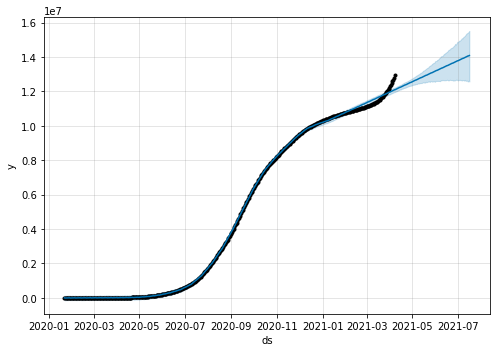

In [ ]:
c_model.plot(c_prediction,figsize=(7,5))


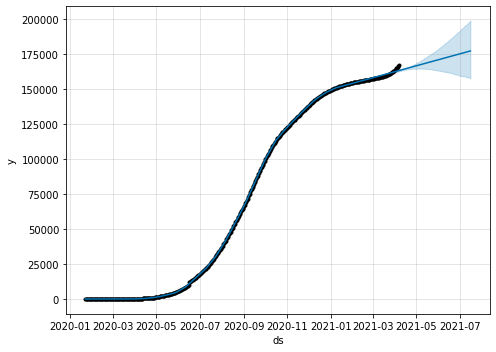

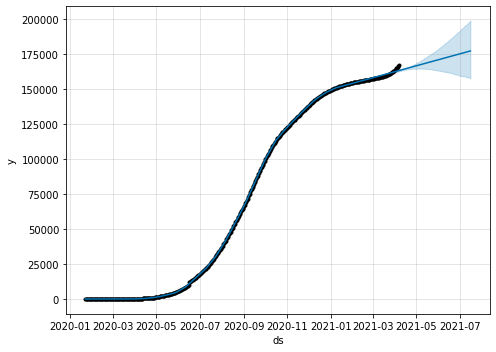

In [ ]:
d_model.plot(d_prediction,figsize=(7,5))

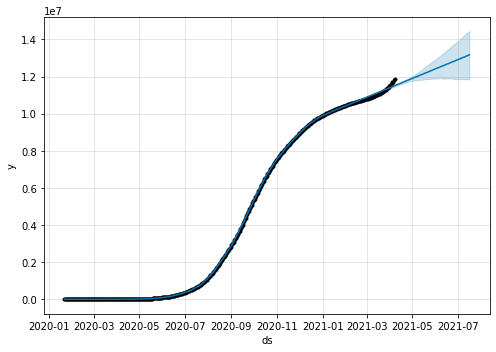

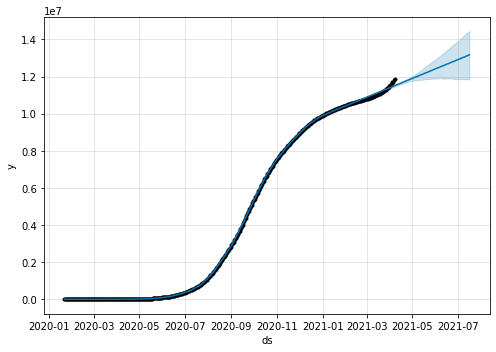

In [ ]:
r_model.plot(r_prediction,figsize=(7,5))

### Confirmed cases prediction

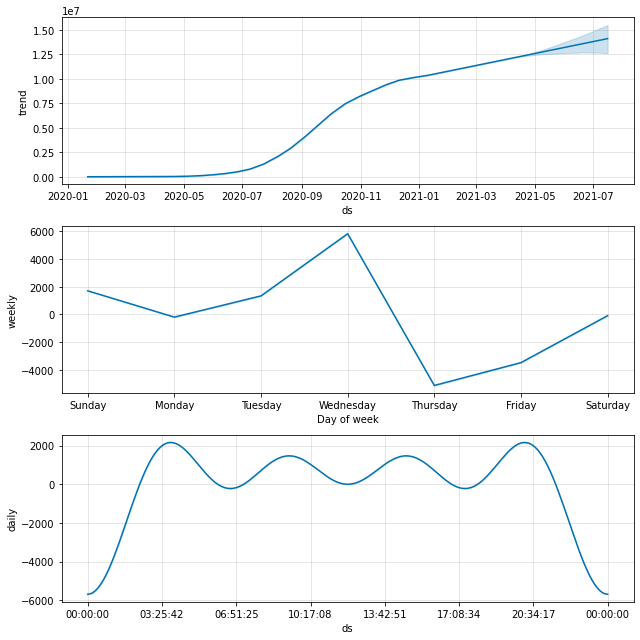

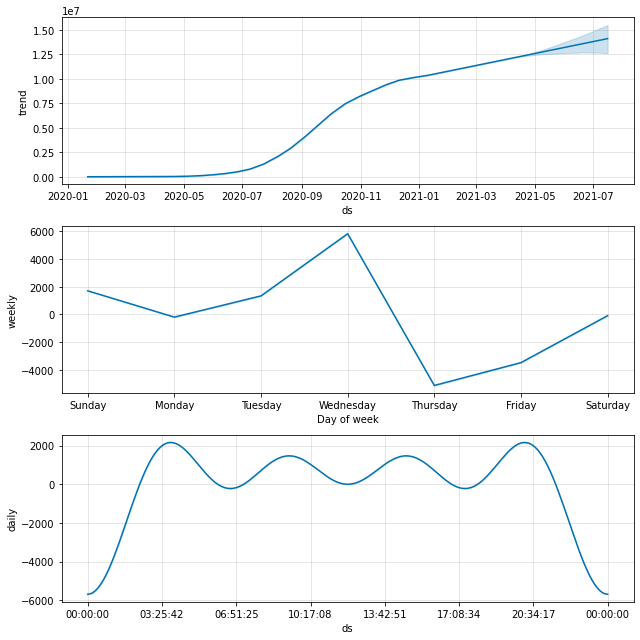

In [ ]:
# Visualize each components [Trends, Weekly]
c_model.plot_components(c_prediction)

### Death cases prediction

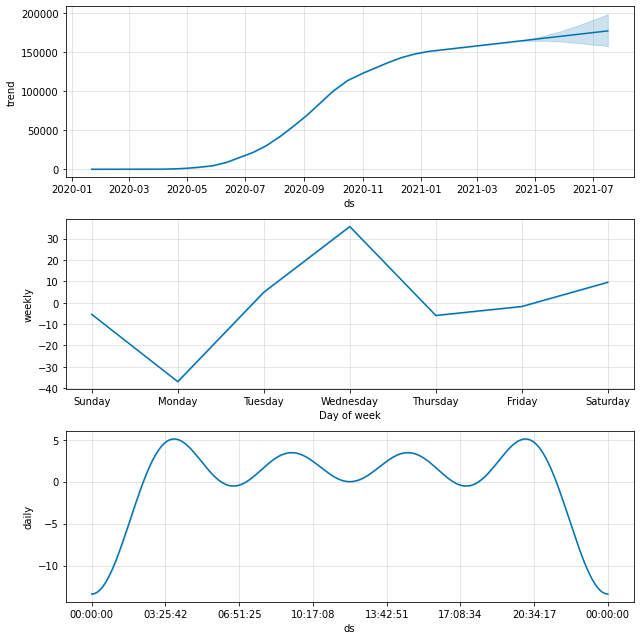

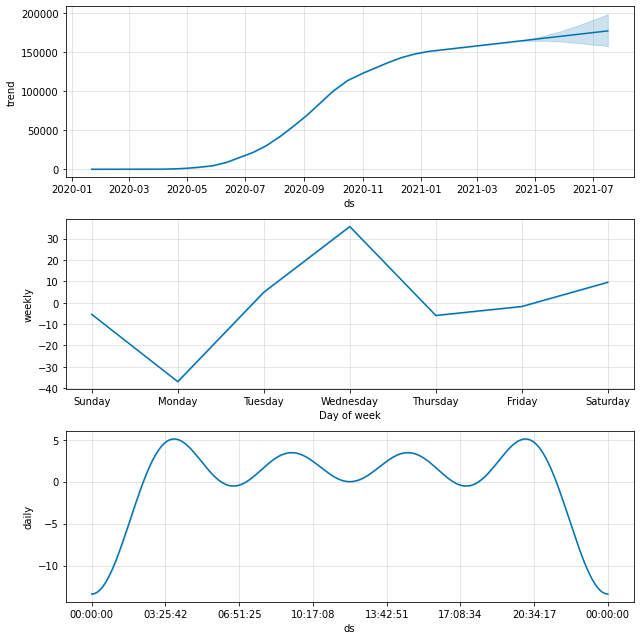

In [ ]:
# Visualize each components [Trends, Weekly]
d_model.plot_components(d_prediction)

### Recovered cases prediction

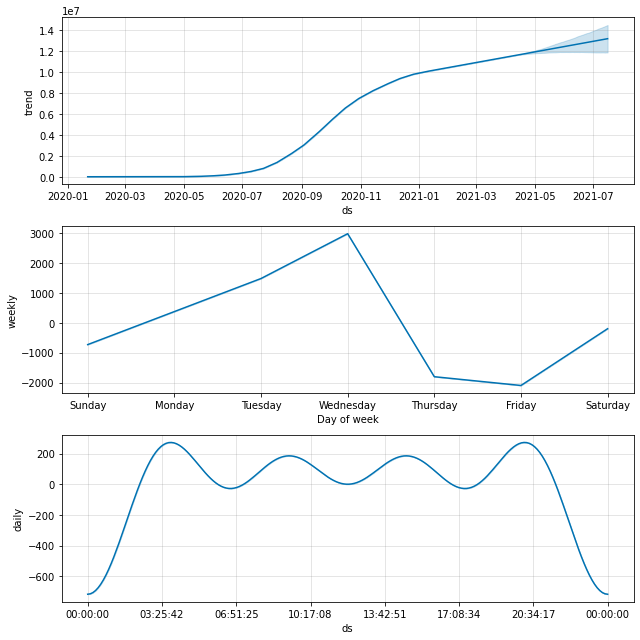

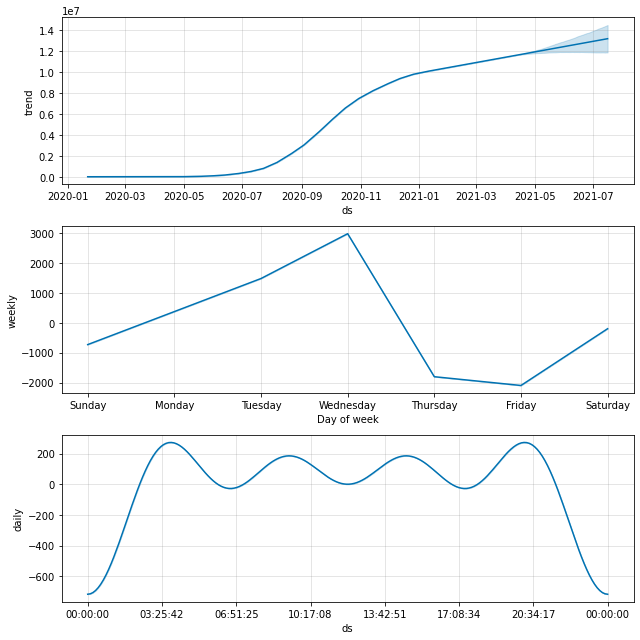

In [ ]:
# Visualize each components [Trends, Weekly]
r_model.plot_components(r_prediction)

### Prophet Model Evaluation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv_c = cross_validation(c_model, period='1 days', horizon = '100 days')
df_cv_d = cross_validation(d_model, period='1 days', horizon = '100 days')
df_cv_r = cross_validation(r_model, period='1 days', horizon = '100 days')

INFO:fbprophet:Making 42 forecasts with cutoffs between 2020-11-17 00:00:00 and 2020-12-28 00:00:00


INFO:fbprophet:Making 42 forecasts with cutoffs between 2020-11-17 00:00:00 and 2020-12-28 00:00:00


INFO:fbprophet:Making 42 forecasts with cutoffs between 2020-11-17 00:00:00 and 2020-12-28 00:00:00


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p_c = performance_metrics(df_cv_c)
df_p_d = performance_metrics(df_cv_d)
df_p_r = performance_metrics(df_cv_r)

In [ ]:
print(df_p_c.head())
print(df_p_r.head())
print(df_p_d.head())

  horizon           mse           rmse  ...      mape     mdape  coverage
0 10 days  9.665849e+10  310899.492616  ...  0.030954  0.030827       0.0
1 11 days  1.096036e+11  331064.369283  ...  0.032921  0.032957       0.0
2 12 days  1.237587e+11  351793.579828  ...  0.034940  0.035038       0.0
3 13 days  1.391525e+11  373031.445402  ...  0.037002  0.037110       0.0
4 14 days  1.558330e+11  394756.943462  ...  0.039106  0.039109       0.0

[5 rows x 7 columns]
  horizon           mse           rmse  ...      mape     mdape  coverage
0 10 days  1.579322e+11  397406.834309  ...  0.041870  0.041296       0.0
1 11 days  1.775535e+11  421371.015965  ...  0.044294  0.043928       0.0
2 12 days  1.986976e+11  445755.104763  ...  0.046753  0.046157       0.0
3 13 days  2.214079e+11  470539.964750  ...  0.049242  0.048886       0.0
4 14 days  2.457441e+11  495725.851715  ...  0.051759  0.051211       0.0

[5 rows x 7 columns]
  horizon           mse         rmse          mae      mape     mdap

In [ ]:
print("Confirmed Cases")
print(df_p_c.mean())
print("Recovered Cases")
print(df_p_r.mean())
print("Deaths")
print(df_p_d.mean())


Confirmed Cases
horizon     55 days 00:00:00
mse              3.55525e+12
rmse             1.67362e+06
mae              1.65669e+06
mape                0.152728
mdape               0.151599
coverage         0.000104657
dtype: object
Recovered Cases
horizon     55 days 00:00:00
mse              5.15717e+12
rmse             2.01177e+06
mae              1.99499e+06
mape                 0.19002
mdape               0.188892
coverage                   0
dtype: object
Deaths
horizon     55 days 00:00:00
mse              5.69023e+08
rmse                 20828.8
mae                  20652.5
mape                0.133442
mdape               0.129841
coverage                   0
dtype: object


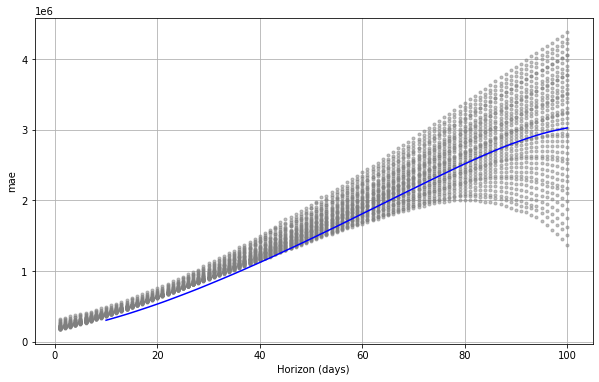

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_c, metric='mae')

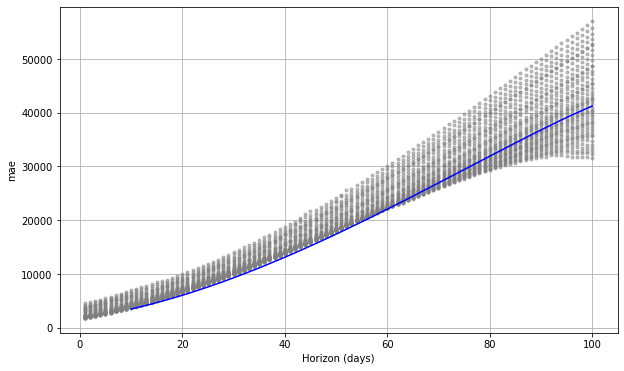

In [ ]:
fig = plot_cross_validation_metric(df_cv_d, metric='mae')

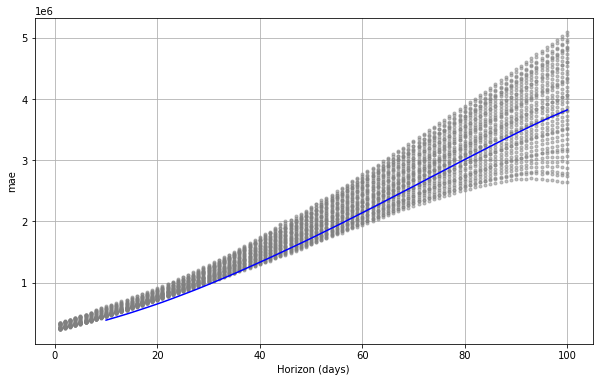

In [ ]:
fig = plot_cross_validation_metric(df_cv_r, metric='mae')

## method2: polynomial regression 

In [ ]:
dates =  c_df23.keys()

In [ ]:
c_df11 = dfconfirmed_cases.rename(columns={ 146 : "TotalConfirmed"})
d_df11 = dfdeaths_reported.rename(columns={ 146 : "TotalDeath"})
r_df11 = dfrecovered_cases.rename(columns={ 131 : "TotalRecovered"})

In [ ]:
c_df12 = c_df11.TotalConfirmed
d_df12 = d_df11.TotalDeath
r_df12 = r_df11.TotalRecovered

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
c_india_cases = np.array(c_df12).reshape(-1, 1)
d_india_cases = np.array(d_df12).reshape(-1, 1)
r_india_cases = np.array(r_df12).reshape(-1, 1)

In [ ]:
days_in_future = 100
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-100]

In [ ]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
#confirmed split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, c_india_cases, test_size=0.25, shuffle=False) 
#death split
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22, d_india_cases, test_size=0.25, shuffle=False) 
#recovery split
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, r_india_cases, test_size=0.25, shuffle=False) 


In [ ]:
# transform data for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

poly = PolynomialFeatures(degree=1)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forecast = poly.fit_transform(future_forecast)

poly = PolynomialFeatures(degree=1)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forecast = poly.fit_transform(future_forecast)

In [ ]:
# polynomial regression
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
linear_model = LinearRegression(normalize=True, fit_intercept=False)

linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
c_test_linear_pred = linear_model.predict(poly_X_test_confirmed)
c_linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(c_test_linear_pred, y_test_confirmed))
print('MSE:',(mean_squared_error(c_test_linear_pred, y_test_confirmed)))
print("hn:",r2_score(c_test_linear_pred, y_test_confirmed) ,"\n")

linear_model.fit(poly_X_train_death, y_train_death)
d_test_linear_pred = linear_model.predict(poly_X_test_death)
d_linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(d_test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(d_test_linear_pred, y_test_death))
print("hn:",r2_score(d_test_linear_pred, y_test_death) ,"\n")

linear_model.fit(poly_X_train_recovered, y_train_recovered)
r_test_linear_pred = linear_model.predict(poly_X_test_recovered)
r_linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(r_test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(r_test_linear_pred, y_test_recovered))
print("hn:",r2_score(r_test_linear_pred, y_test_recovered) ,"\n")

#            poly reg         svm
#deg.1 903299345643.7173 106359693663073.06 
#deg.2 46122229536951.26 3652888381451.663
#deg.3 27942757671586.94 91471041514954.9
#deg.4 93304406573972.66 318665880692719.94
#deg.5 424239601158142.2
#deg.6 40824607907653.51
#deg.6 3371379737798652.0


MAE: 818471.663017614
MSE: 905268287138.0388
hn: 0.1989343075489961 

MAE: 10014.453689675749
MSE: 127912217.263184
hn: 0.5024525363492571 

MAE: 1501171.5010240695
MSE: 2432174018901.882
hn: -1.6419192082001701 



### Confirmed cases prediction

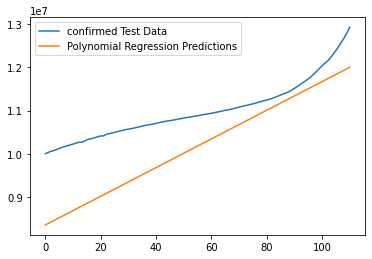

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(c_test_linear_pred)
plt.legend(['confirmed Test Data', 'Polynomial Regression Predictions'])


### Death cases prediction

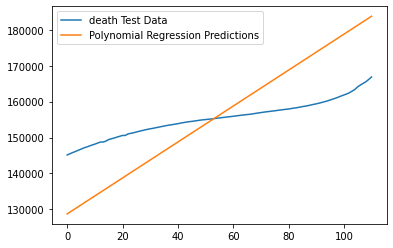

In [ ]:
plt.plot(y_test_death)
plt.plot(d_test_linear_pred)
plt.legend(['death Test Data', 'Polynomial Regression Predictions'])


### Recovered cases prediction

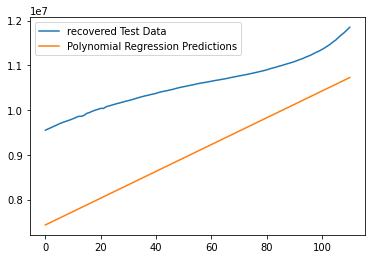

In [ ]:
plt.plot(y_test_recovered)
plt.plot(r_test_linear_pred)
plt.legend(['recovered Test Data', 'Polynomial Regression Predictions'])

## method3: SVM Predictions

In [ ]:
c_y = y_train_confirmed.ravel()
y_train_confirmed = np.array(c_y).astype(int)
d_y = y_train_death.ravel()
y_train_death = np.array(d_y).astype(int)
r_y = y_train_recovered.ravel()
y_train_recovered = np.array(r_y).astype(int)

In [ ]:
from sklearn.svm import SVR
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
c_svm_pred = svm_confirmed.predict(future_forecast)

svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.1)
svm_death.fit(X_train_death, y_train_death)
d_svm_pred = svm_death.predict(future_forecast)

svm_recovered = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=2, C=0.1)
svm_recovered.fit(X_train_recovered, y_train_recovered)
r_svm_pred = svm_recovered.predict(future_forecast)

### Confirmed cases prediction

MAE: 1660237.1795764149
MSE: 3654559843473.5767


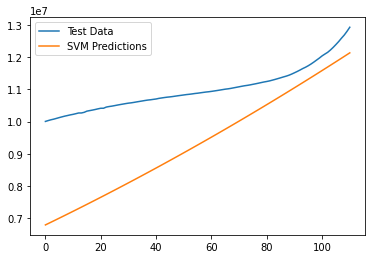

In [ ]:
c_svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(c_svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(c_svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(c_svm_test_pred, y_test_confirmed))

#            poly reg         svm
#deg.1 903299345643.7173 106359693663073.06
#deg.2 46122229536951.26 3652888381451.663
#deg.3 27942757671586.94 91471041514954.9
#deg.4 93304406573972.66 318665880692719.94

### Death cases prediction

MAE: 9181538.94654971
MSE: 86710415944391.67


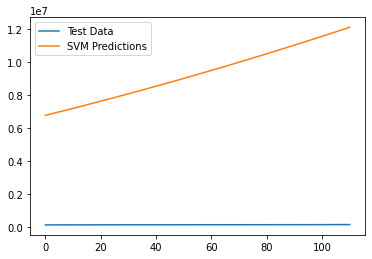

In [ ]:
d_svm_test_pred = svm_confirmed.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(d_svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(d_svm_test_pred, y_test_death))
print('MSE:',mean_squared_error(d_svm_test_pred, y_test_death))



### Recovered cases prediction

MAE: 1315936.2259325297
MSE: 2579123406135.711


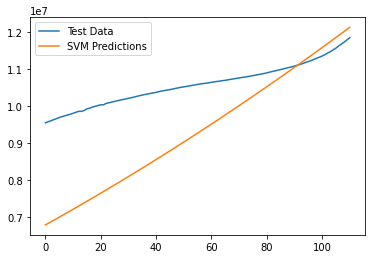

In [ ]:
r_svm_test_pred = svm_confirmed.predict(X_test_recovered)
plt.plot(y_test_recovered)
plt.plot(r_svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(r_svm_test_pred, y_test_recovered))
print('MSE:',mean_squared_error(r_svm_test_pred, y_test_recovered))

## Setting up with dates

In [ ]:
def plot_predictions(x, y, pred, algo_name, color,z):
    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=15)
    plt.xlabel('Days Since 1/22/2020', size=10)
    plt.ylabel('Number of Cases', size=10)
    plt.legend([z, algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()


### graph represention confirmed, death, recovered cases since 1/22/2020  

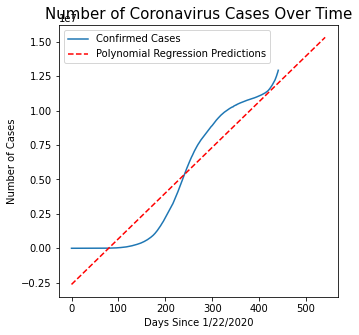

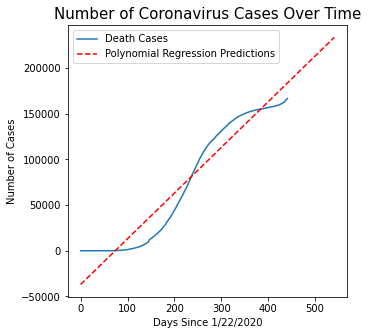

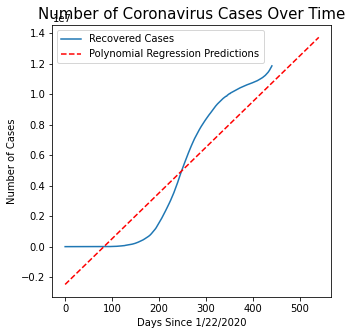

In [ ]:
plot_predictions(adjusted_dates, c_india_cases, c_linear_pred, 'Polynomial Regression Predictions', 'red','Confirmed Cases')
plot_predictions(adjusted_dates, d_india_cases, d_linear_pred, 'Polynomial Regression Predictions', 'red','Death Cases')
plot_predictions(adjusted_dates, r_india_cases, r_linear_pred, 'Polynomial Regression Predictions', 'red','Recovered Cases')

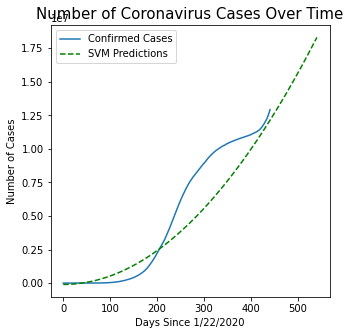

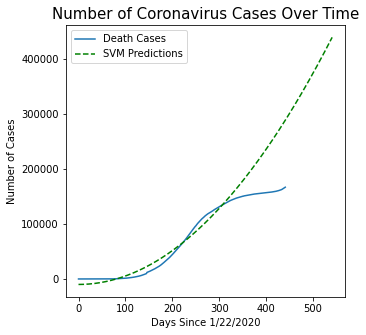

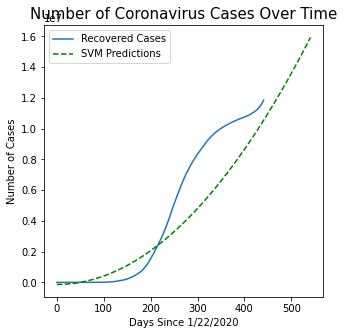

In [ ]:
plot_predictions(adjusted_dates, c_india_cases, c_svm_pred, 'SVM Predictions', 'green','Confirmed Cases')
plot_predictions(adjusted_dates, d_india_cases, d_svm_pred, 'SVM Predictions', 'green','Death Cases')
plot_predictions(adjusted_dates, r_india_cases, r_svm_pred, 'SVM Predictions', 'green','Recovered Cases')

### Predicted data represention confirmed, death, recovered cases since 1/22/2020

In [ ]:
# Future predictions using polynomial regression
c_linear_pred = c_linear_pred.reshape(1,-1)[0]

d_linear_pred = d_linear_pred.reshape(1,-1)[0]

r_linear_pred = r_linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date': future_forecast_dates[-100:], 'polynomial Predicted # of Confirmed Cases india': np.round(c_linear_pred[-100:]),'polynomial Predicted # Death Cases india': np.round(d_linear_pred[-100:]),'polynomial Predicted # Recovered Cases india': np.round(r_linear_pred[-100:])})
poly_df.head(20)

,Date,polynomial Predicted # of Confirmed Cases india,polynomial Predicted # Death Cases india,polynomial Predicted # Recovered Cases india
0,04/08/2021,12036482.0,184267.0,10757136.0
1,04/09/2021,12069659.0,184768.0,10787081.0
2,04/10/2021,12102836.0,185268.0,10817026.0
3,04/11/2021,12136013.0,185768.0,10846971.0
4,04/12/2021,12169191.0,186269.0,10876916.0
5,04/13/2021,12202368.0,186769.0,10906861.0
6,04/14/2021,12235545.0,187270.0,10936806.0
7,04/15/2021,12268722.0,187770.0,10966750.0
8,04/16/2021,12301900.0,188271.0,10996695.0
9,04/17/2021,12335077.0,188771.0,11026640.0


In [ ]:
v11 = confirmed_tidy[confirmed_tidy.columns[4:6]]
v11['Date'] = pd.to_datetime(v11['Date'])
v11['type'] = 'Confirmed'
v11
c_poly_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Confirmed': np.round(c_linear_pred[-100:])})
c_poly_df['Date'] = pd.to_datetime(c_poly_df['Date'])
c_poly_df['type'] = 'Confirmed'
df112 = pd.concat([v11,c_poly_df], axis=0)
df112.reset_index(drop=True, inplace=True)
df1122 = df112.rename(columns={"Confirmed": "Poly_count"})

In [ ]:
v12 = deaths_tidy[deaths_tidy.columns[4:6]]
v12['Date'] = pd.to_datetime(v12['Date'])
v12['type'] = 'Death'
d_poly_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Deaths': np.round(d_linear_pred[-100:])})
d_poly_df['Date'] = pd.to_datetime(d_poly_df['Date'])
d_poly_df['type'] = 'Death'
df113 = pd.concat([v12,d_poly_df], axis=0)
df113.reset_index(drop=True, inplace=True)
df1133 = df113.rename(columns={"Deaths": "Poly_count"})

In [ ]:
v13 = recovered_tidy[recovered_tidy.columns[4:6]]
v13['Date'] = pd.to_datetime(v13['Date'])
v13['type'] = 'Recovered'
r_poly_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'recovered': np.round(r_linear_pred[-100:])})
r_poly_df['Date'] = pd.to_datetime(r_poly_df['Date'])
r_poly_df['type'] = 'Recovered'
df114 = pd.concat([v13,r_poly_df], axis=0)
df114.reset_index(drop=True, inplace=True)
df1144 = df114.rename(columns={"recovered": "Poly_count"})

In [ ]:
f_df113 = pd.concat([df1122,df1133,df1144], axis=0)
f_df113.reset_index(drop=True, inplace=True)

In [ ]:
corona_sums3 = f_df113.groupby(['type', 'Date'],as_index=False).agg({'Poly_count':'sum'})
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='Poly_count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums3)
fig.show()

In [ ]:
v11 = confirmed_tidy[confirmed_tidy.columns[4:6]]
v11['Date'] = pd.to_datetime(v11['Date'])
v11['type'] = 'Confirmed'
v11
c_svm_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Confirmed': np.round(c_svm_pred[-100:])})
c_svm_df['Date'] = pd.to_datetime(c_svm_df['Date'])
c_svm_df['type'] = 'Confirmed'
sdf112 = pd.concat([v11,c_svm_df], axis=0)
sdf112.reset_index(drop=True, inplace=True)
sdf1122 = sdf112.rename(columns={"Confirmed": "svm_count"})

v12 = deaths_tidy[deaths_tidy.columns[4:6]]
v12['Date'] = pd.to_datetime(v12['Date'])
v12['type'] = 'Death'
v12
d_svm_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'Deaths': np.round(d_svm_pred[-100:])})
d_svm_df['Date'] = pd.to_datetime(d_svm_df['Date'])
d_svm_df['type'] = 'Death'
sdf113 = pd.concat([v12,d_svm_df], axis=0)
sdf113.reset_index(drop=True, inplace=True)
sdf1133 = sdf113.rename(columns={"Deaths": "svm_count"})

v13 = recovered_tidy[recovered_tidy.columns[4:6]]
v13['Date'] = pd.to_datetime(v12['Date'])
v13['type'] = 'Recovered'

r_svm_df= pd.DataFrame({'Date': future_forecast_dates[-100:], 'recovered': np.round(r_svm_pred[-100:])})
r_svm_df['Date'] = pd.to_datetime(r_svm_df['Date'])
r_svm_df['type'] = 'Recovered'
sdf114 = pd.concat([v13,r_svm_df], axis=0)
sdf114.reset_index(drop=True, inplace=True)
sdf1144 = sdf114.rename(columns={"recovered": "svm_count"})

sf_df113 = pd.concat([sdf1122,sdf1133,sdf1144], axis=0)
sf_df113.reset_index(drop=True, inplace=True)

In [ ]:
corona_sums4 = sf_df113.groupby(['type', 'Date'],as_index=False).agg({'svm_count':'sum'})
def plot_timeseries(df):
    fig = px.line(df, x='Date', y='svm_count', color='type',\
             template='plotly_dark')

    fig.update_layout(legend_orientation="h")
    return(fig)

fig = plot_timeseries(corona_sums4)
fig.show()

### Conclusion

In [ ]:

r_b = print((mean_squared_error(c_test_linear_pred, y_test_confirmed)))
s_b = print(mean_squared_error(c_svm_test_pred, y_test_confirmed))

905268287138.0388
3654559843473.5767


In [ ]:
a = pd.DataFrame(df_p_c.mean())
b = a.transpose()
v = b.astype(int)
print('form prophet model:\n',v['mse'],'\n')
print("from poly reg model:\n",(mean_squared_error(c_test_linear_pred, y_test_confirmed)))
print("\nfrom svm model:\n",(mean_squared_error(c_svm_test_pred, y_test_confirmed)))

form prophet model:
 0    3555245852724
Name: mse, dtype: int64 

from poly reg model:
 905268287138.0388

from svm model:
 3654559843473.5767




1.   3591561446479.00   p
2.   961973830352.7228  r
3.   3937222318767.7705 s
